In [56]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
# Ler arquivo de dados
df_diesel = pd.read_csv("/content/drive/MyDrive/datasets/ultimas-4-semanas-diesel-gnv-2.csv", sep=';', error_bad_lines=False, decimal=',')
df_gaseta = pd.read_csv("/content/drive/MyDrive/datasets/ultimas-4-semanas-gasolina-etanol-2.csv", sep=';', error_bad_lines=False, decimal=',')

In [3]:
df_diesel.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL S10,20/10/2021,6.42,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL,20/10/2021,6.40,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,DIESEL S10,20/10/2021,6.37,NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,DIESEL,20/10/2021,6.37,NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,DIESEL S10,20/10/2021,6.42,NaN,R$ / litro,BRANCA


In [4]:
df_diesel.shape

(24876, 16)

In [5]:
df_diesel.dtypes

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [6]:
df_gaseta.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,20/10/2021,7.30,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,ETANOL,20/10/2021,6.58,NaN,R$ / litro,IPIRANGA
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA ADITIVADA,20/10/2021,7.35,NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,GASOLINA,20/10/2021,7.28,NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,20/10/2021,7.30,NaN,R$ / litro,BRANCA


In [7]:
df_gaseta.shape

(49519, 16)

In [8]:
df_gaseta.dtypes

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [9]:
df = pd.concat([df_diesel, df_gaseta])

In [10]:
df.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL S10,20/10/2021,6.42,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,DIESEL,20/10/2021,6.40,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,DIESEL S10,20/10/2021,6.37,NaN,R$ / litro,IPIRANGA
3,N,AC,CRUZEIRO DO SUL,AMAZONIA COMERCIO DE DERIVADOS DE PETROLEO - E...,01.492.748/0003-83,AVENIDA COPACABANA,440,NaN,COPACABANA,69980-000,DIESEL,20/10/2021,6.37,NaN,R$ / litro,IPIRANGA
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,DIESEL S10,20/10/2021,6.42,NaN,R$ / litro,BRANCA


In [11]:
df.shape

(74395, 16)

In [12]:
df.dtypes

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda       float64
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

In [13]:
df.isnull().sum()

Região - Sigla           0
Estado - Sigla           0
Município                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Número Rua              28
Complemento          58768
Bairro                 144
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      74395
Unidade de Medida        0
Bandeira                 0
dtype: int64

In [14]:
df["Data da Coleta"] = pd.to_datetime(df["Data da Coleta"])

In [15]:
df.dtypes

Região - Sigla               object
Estado - Sigla               object
Município                    object
Revenda                      object
CNPJ da Revenda              object
Nome da Rua                  object
Número Rua                   object
Complemento                  object
Bairro                       object
Cep                          object
Produto                      object
Data da Coleta       datetime64[ns]
Valor de Venda              float64
Valor de Compra             float64
Unidade de Medida            object
Bandeira                     object
dtype: object

In [18]:
df["Município"].value_counts()

SAO PAULO         2212
FORTALEZA         1601
SALVADOR          1161
RIO DE JANEIRO    1127
CUIABA            1090
                  ... 
PIMENTA BUENO       18
LAGES               11
ROSARIO DO SUL       6
PICOS                5
MESQUITA             5
Name: Município, Length: 370, dtype: int64

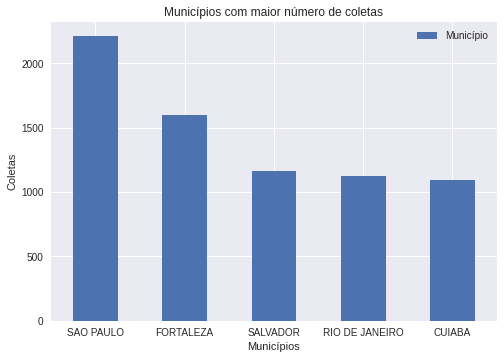

In [158]:
df_municipios = df["Município"].value_counts()
df_municipios.nlargest(5).plot.bar(title="Municípios com maior número de coletas")
plt.xlabel("Municípios")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Municipios_maior_coletas.png")

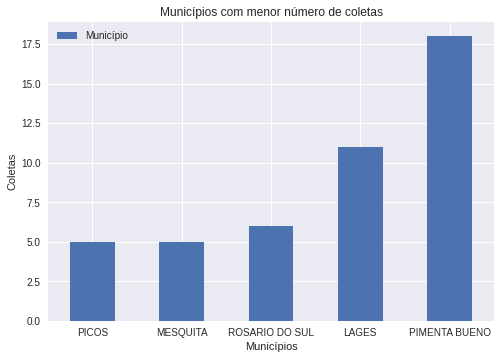

In [159]:
df_municipios = df["Município"].value_counts()
df_municipios.nsmallest(5).plot.bar(title="Municípios com menor número de coletas")
plt.xlabel("Municípios")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Municipios_menor_coletas.png")

In [19]:
df["Revenda"].value_counts()

SIM REDE DE POSTOS LTDA                                          326
COMERCIAL BUFFON COMBUSTIVEIS E TRANSPORTES LIMITADA             231
CARREFOUR COMERCIO E INDUSTRIA LTDA                              196
CASCOL COMBUSTIVEIS PARA VEICULOS LTDA                           184
COMERCIAL AMAZONIA DE PETROLEO EIRELI                            128
                                                                ... 
POSTO DE ABASTECIMENTO TRERIENSE LTDA                              1
FARIAS ALVES & CORREIA LTDA                                        1
CENTRO AUTOMOTIVO DE CAMAÇARI LTDA.                                1
FROSINONE POSTO DE GNV LTDA                                        1
SAO CRISTOVAO COMERCIO DE PRODUTOS DERIVADOS DE PETROLEO LTDA      1
Name: Revenda, Length: 7079, dtype: int64

In [20]:
df["CNPJ da Revenda"].value_counts()

 93.489.243/0026-74    24
 81.326.258/0007-70    24
 08.540.382/0001-58    24
 02.877.155/0001-36    24
 08.350.555/0008-41    24
                       ..
 04.879.407/0001-91     1
 04.926.070/0001-26     1
 02.485.626/0001-60     1
 17.654.293/0001-23     1
 03.659.452/0004-10     1
Name: CNPJ da Revenda, Length: 8011, dtype: int64

In [21]:
df["Bandeira"].value_counts()

BRANCA                          27076
IPIRANGA                        12562
RAIZEN                          11990
VIBRA ENERGIA                    8208
PETROBRAS DISTRIBUIDORA S.A.     7968
ALESAT                           1642
SABBÁ                             802
RAIZEN MIME                       416
ATEM' S                           350
RODOIL                            333
SP                                306
EQUADOR                           279
TAURUS                            216
IDAZA                             174
DISLUB                            154
PETROX DISTRIBUIDORA              154
STANG                             140
CHARRUA                           137
RIO BRANCO                        135
CIAPETRO                          133
TOTAL BRASIL                      111
SIMARELLI                          89
MAXSUL                             72
TDC DISTRIBUIDORA                  70
SETTA DISTRIBUIDORA                67
PETROSERRA                         67
AMERICANOIL 

In [22]:
df["Estado - Sigla"].value_counts()

SP    22520
MG     6727
RJ     5759
RS     4689
PR     4489
BA     3685
SC     3458
CE     3225
PE     2636
MT     2502
GO     2432
ES     1276
PA     1208
MS     1121
RN     1026
PB      915
MA      864
PI      850
AM      815
AL      711
DF      699
RO      675
SE      636
AC      629
TO      509
RR      193
AP      146
Name: Estado - Sigla, dtype: int64

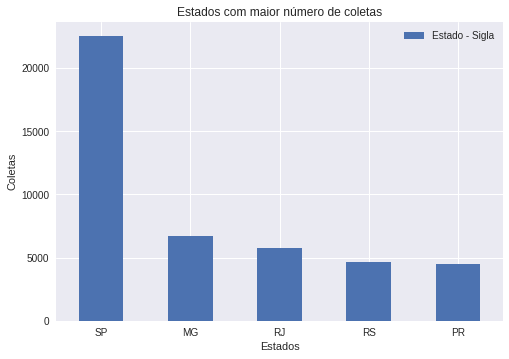

In [160]:
df_estados = df["Estado - Sigla"].value_counts()
df_estados.nlargest(5).plot.bar(title="Estados com maior número de coletas")
plt.xlabel("Estados")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Estados_maior_coletas.png")

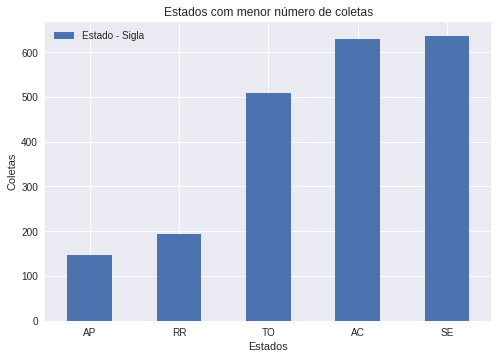

In [161]:
df_estados = df["Estado - Sigla"].value_counts()
df_estados.nsmallest(5).plot.bar(title="Estados com menor número de coletas")
plt.xlabel("Estados")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Estados_menor_coletas.png")

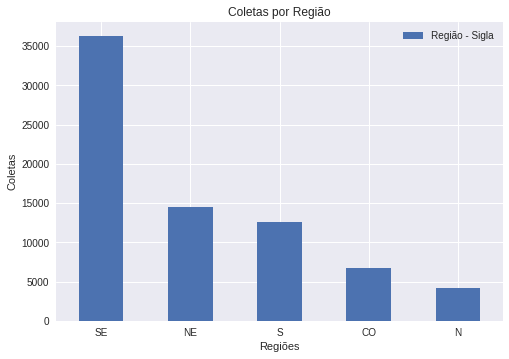

In [162]:
#Coletas de preços por região
df["Região - Sigla"].value_counts().plot.bar(title="Coletas por Região")
plt.xlabel("Regiões")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Coletas_regiões.png")

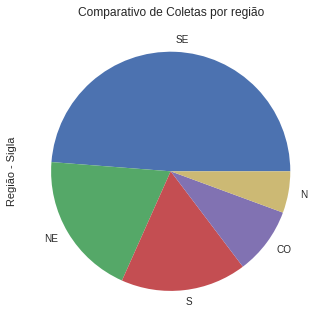

In [163]:
df["Região - Sigla"].value_counts().plot.pie(title="Comparativo de Coletas por região");
plt.savefig("Coletas_Regiões_comparativo.png")

In [ ]:
df["Região - Sigla"].value_counts()

In [24]:
df["Produto"].value_counts()

GASOLINA              18817
ETANOL                16707
DIESEL S10            15130
GASOLINA ADITIVADA    13995
DIESEL                 8328
GNV                    1418
Name: Produto, dtype: int64

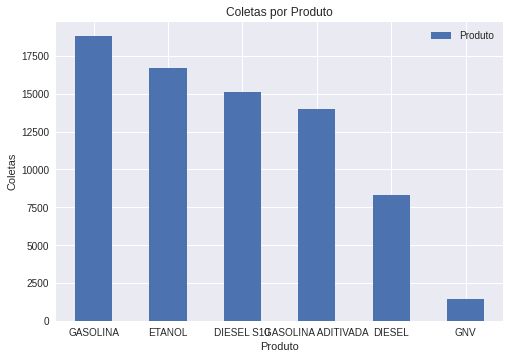

In [164]:
#Coletas de preços por região
df["Produto"].value_counts().plot.bar(title="Coletas por Produto")
plt.xlabel("Produto")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Coletas_produtos.png")

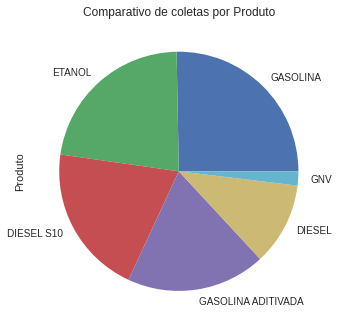

In [165]:
#Número de coletas de preços por Produto
df["Produto"].value_counts().plot.pie(title="Comparativo de coletas por Produto");
plt.savefig("Coletas_produtos_comparativo.png")

In [25]:
df["Data da Coleta"].value_counts()

2021-03-11    6585
2021-10-26    5658
2021-10-11    5593
2021-10-19    5448
2021-01-11    5237
2021-10-27    5216
2021-10-20    5164
2021-09-11    5162
2021-10-25    5119
2021-08-11    4997
2021-10-18    4835
2021-02-11    4085
2021-11-11    3039
2021-10-21    2665
2021-04-11    2422
2021-10-28    2395
2021-05-11     448
2021-10-22     187
2021-12-11     113
2021-10-29      27
Name: Data da Coleta, dtype: int64

In [ ]:
df["Mes da Coleta"] = df["Data da Coleta"].dt.month
df.sort_values(by="Mes da Coleta")

In [150]:
df_meses = df["Mes da Coleta"].value_counts()
df_meses.head()

10    42307
3      6585
1      5237
9      5162
8      4997
Name: Mes da Coleta, dtype: int64

In [156]:
df_meses_sorted = df_meses.sort_index()

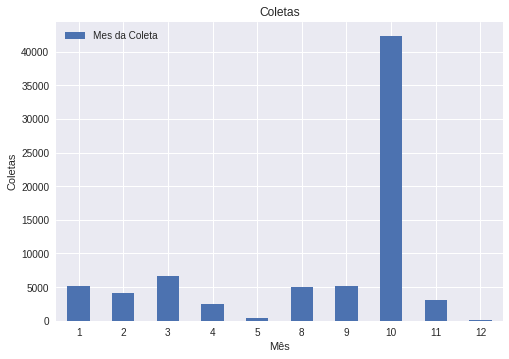

In [166]:
#Coletas de preços por região
df_meses_sorted.plot.bar(title="Coletas", )
plt.xlabel("Mês")
plt.ylabel("Coletas")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Coletas_tempo.png")

In [30]:
df.groupby(["Data da Coleta", "Produto"])["Valor de Venda"].mean()

Data da Coleta  Produto           
2021-01-11      DIESEL                5.349471
                DIESEL S10            5.451397
                ETANOL                5.438075
                GASOLINA              6.697313
                GASOLINA ADITIVADA    6.848472
                                        ...   
2021-12-11      DIESEL S10            5.330955
                ETANOL                5.643773
                GASOLINA              6.545452
                GASOLINA ADITIVADA    6.620840
                GNV                   4.324000
Name: Valor de Venda, Length: 120, dtype: float64

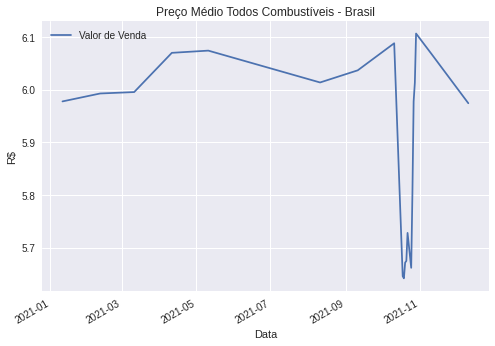

In [167]:
df.groupby("Data da Coleta")["Valor de Venda"].mean().plot(title="Preço Médio Todos Combustíveis - Brasil")
plt.xlabel("Data")
plt.ylabel("R$")
plt.legend();
plt.savefig("Valor_venda_medio.png")

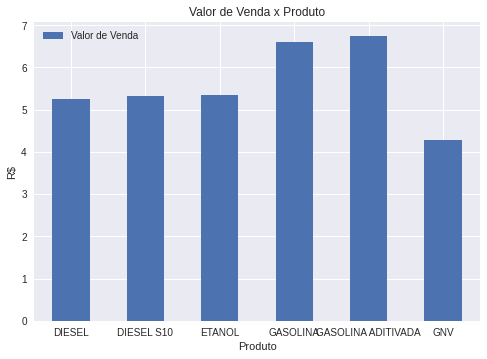

In [168]:
df.groupby("Produto")["Valor de Venda"].mean().plot.bar(title="Valor de Venda x Produto")
plt.xlabel("Produto")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_por_produto.png")

In [46]:
df["Valor de Venda"].min()

2.849

In [47]:
df["Valor de Venda"].max()

8.499

In [49]:
df[df["Valor de Venda"] == 2.849]

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
671,CO,MT,CUIABA,CASTRO & CARVALHO LTDA,24.726.325/0001-14,RODOVIA PALMIRO PAES DE BARROS,862,NaN,JARDIM NOSSA SENHORA APARECIDA,78090-700,GNV,2021-10-19,2.849,NaN,R$ / m³,BRANCA
6757,CO,MT,CUIABA,CASTRO & CARVALHO LTDA,24.726.325/0001-14,RODOVIA PALMIRO PAES DE BARROS,862,NaN,JARDIM NOSSA SENHORA APARECIDA,78090-700,GNV,2021-10-28,2.849,NaN,R$ / m³,BRANCA
12897,CO,MT,CUIABA,CASTRO & CARVALHO LTDA,24.726.325/0001-14,RODOVIA PALMIRO PAES DE BARROS,862,NaN,JARDIM NOSSA SENHORA APARECIDA,78090-700,GNV,2021-03-11,2.849,NaN,R$ / m³,BRANCA


In [50]:
df[df["Valor de Venda"] == 8.499]

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
41024,SE,SP,SAO PAULO,AUTO POSTO BARONESA,46.952.313/0001-40,AVENIDA ANGELICA,806,NaN,SANTA CECILIA,01228-000,GASOLINA ADITIVADA,2021-11-11,8.499,NaN,R$ / litro,VIBRA ENERGIA
41231,SE,SP,SAO PAULO,DUQUE & CIA LTDA,46.359.261/0001-01,AVENIDA ANGELICA,1569,NaN,SANTA CECILIA,01227-100,GASOLINA ADITIVADA,2021-11-11,8.499,NaN,R$ / litro,VIBRA ENERGIA
41254,SE,SP,SAO PAULO,AUTO POSTO VEIGA FILHO LTDA,43.552.462/0001-24,RUA CONS BROTERO,1469,NaN,SANTA CECILIA,01232-010,GASOLINA ADITIVADA,2021-11-11,8.499,NaN,R$ / litro,VIBRA ENERGIA


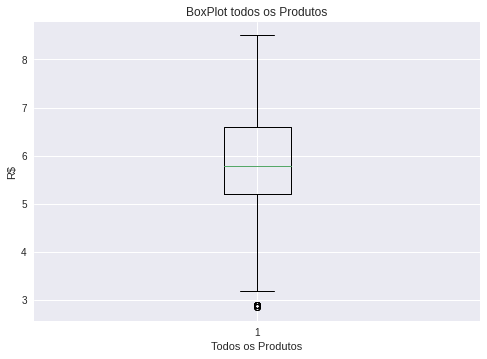

In [205]:
#Media do valor de vendas de todos os produtos
plt.boxplot(df["Valor de Venda"]);
plt.title("BoxPlot todos os Produtos")
plt.xlabel("Todos os Produtos")
plt.ylabel("R$")
plt.savefig("BoxPlot_todos_produtos.png")

In [66]:
df_di = df[df["Produto"] == "DIESEL"]

In [67]:
df_di.shape

(8328, 16)

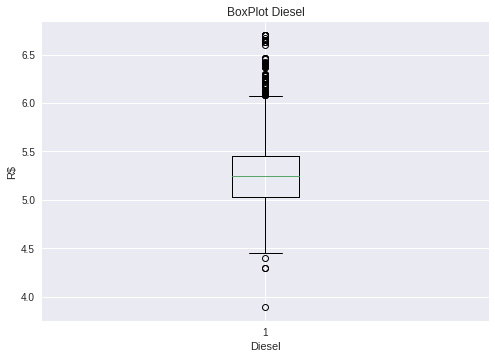

In [206]:
#Media do valor de vendas de Diesel
plt.boxplot(df_di["Valor de Venda"]);
plt.title("BoxPlot Diesel")
plt.xlabel("Diesel")
plt.ylabel("R$")
plt.savefig("BoxPlot_Diesel.png")

In [68]:
df_dis10 = df[df["Produto"] == "DIESEL S10"]

In [69]:
df_dis10.shape

(15130, 16)

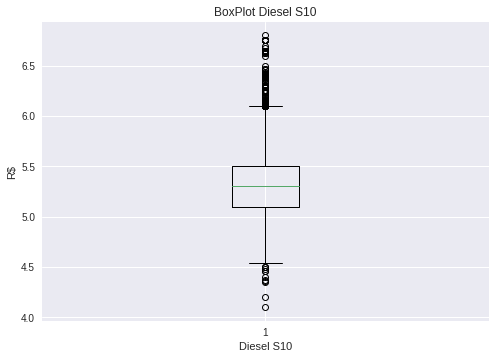

In [207]:
#Media do valor de vendas de Diesel S10
plt.boxplot(df_dis10["Valor de Venda"]);
plt.title("BoxPlot Diesel S10")
plt.xlabel("Diesel S10")
plt.ylabel("R$")
plt.savefig("BoxPlot_DieselS10.png")

In [70]:
df_gaso = df[df["Produto"] == "GASOLINA"]

In [71]:
df_gaso.shape

(18817, 16)

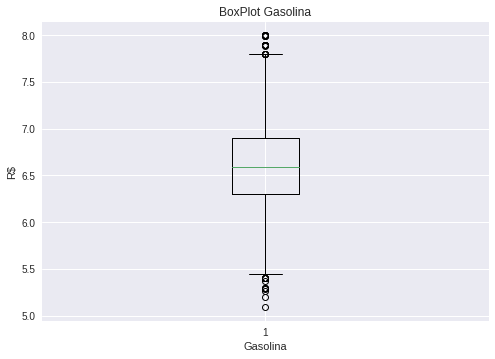

In [208]:
#Media do valor de vendas de Gasolina
plt.boxplot(df_gaso["Valor de Venda"]);
plt.title("BoxPlot Gasolina")
plt.xlabel("Gasolina")
plt.ylabel("R$")
plt.savefig("BoxPlot_Gasolina.png")

In [72]:
df_eta = df[df["Produto"] == "ETANOL"]

In [73]:
df_eta.shape

(16707, 16)

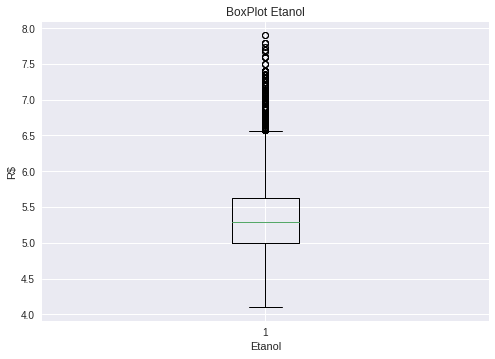

In [209]:
#Media do valor de vendas de Etanol
plt.boxplot(df_eta["Valor de Venda"]);
plt.title("BoxPlot Etanol")
plt.xlabel("Etanol")
plt.ylabel("R$")
plt.savefig("BoxPlot_Etanol.png")

In [74]:
df_gasoa = df[df["Produto"] == "GASOLINA ADITIVADA"]

In [75]:
df_gasoa.shape

(13995, 16)

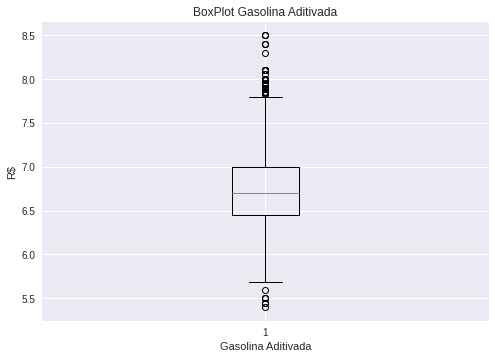

In [210]:
#Media do valor de vendas de Gasolina Aditivada
plt.boxplot(df_gasoa["Valor de Venda"]);
plt.title("BoxPlot Gasolina Aditivada")
plt.xlabel("Gasolina Aditivada")
plt.ylabel("R$")
plt.savefig("BoxPlot_GasolinaAditivada.png")

In [76]:
df_gnv = df[df["Produto"] == "GNV"]

In [77]:
df_gnv.shape

(1418, 16)

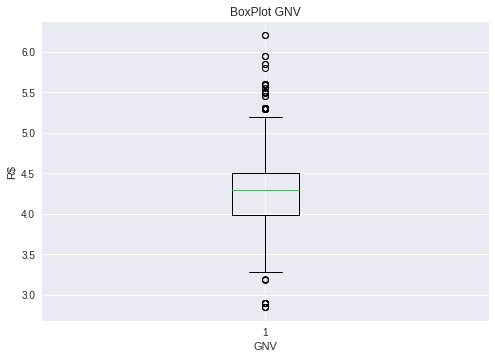

In [211]:
#Media do valor de vendas de GNV
plt.boxplot(df_gnv["Valor de Venda"]);
plt.title("BoxPlot GNV")
plt.xlabel("GNV")
plt.ylabel("R$")
plt.savefig("BoxPlot_GNV.png")

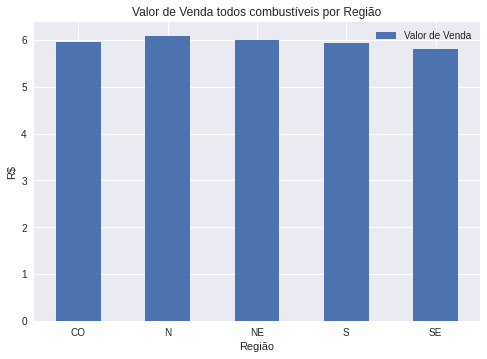

In [193]:
df.groupby("Região - Sigla")["Valor de Venda"].mean().plot.bar(title="Valor de Venda todos combustíveis por Região")
plt.xlabel("Região")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_medio_regiões.png")

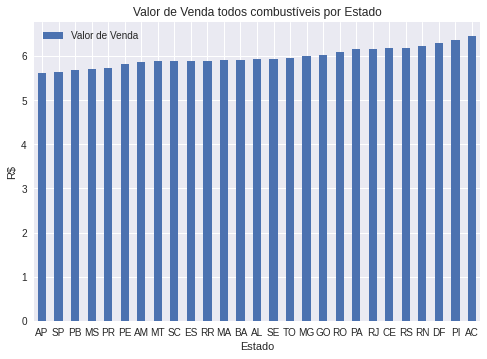

In [194]:
df.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values().plot.bar(title="Valor de Venda todos combustíveis por Estado")
plt.xlabel("Estado")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_medio_estados.png")

In [187]:
df.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values()

Estado - Sigla
AP    5.606781
SP    5.637683
PB    5.681846
MS    5.712531
PR    5.719141
PE    5.814958
AM    5.872394
MT    5.884509
SC    5.887670
ES    5.896708
RR    5.897979
MA    5.910248
BA    5.919389
AL    5.922449
SE    5.927096
TO    5.953513
MG    5.998098
GO    6.022610
RO    6.096566
PA    6.160888
RJ    6.164379
CE    6.181165
RS    6.190578
RN    6.238574
DF    6.298891
PI    6.360064
AC    6.453224
Name: Valor de Venda, dtype: float64

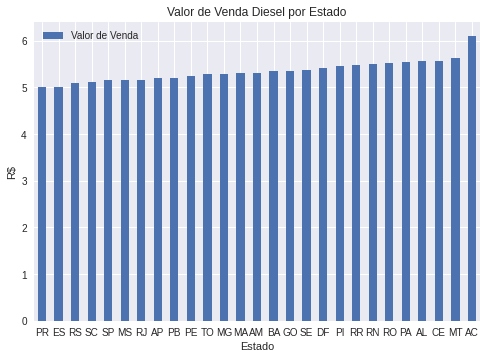

In [195]:
df_di.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values().plot.bar(title="Valor de Venda Diesel por Estado")
plt.xlabel("Estado")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_diesel_estados.png")

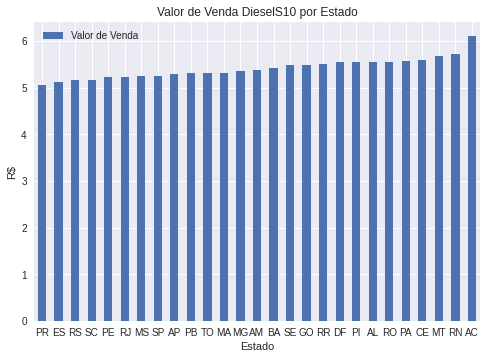

In [196]:
df_dis10.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values().plot.bar(title="Valor de Venda DieselS10 por Estado")
plt.xlabel("Estado")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_dieselS10_estados.png")

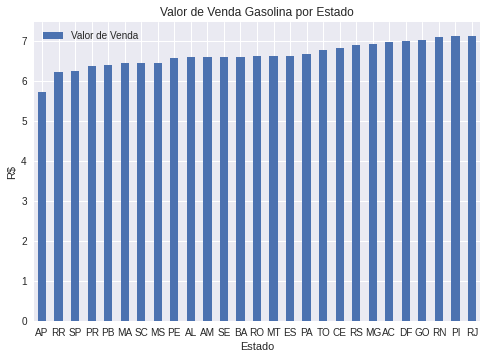

In [197]:
df_gaso.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values().plot.bar(title="Valor de Venda Gasolina por Estado")
plt.xlabel("Estado")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_gasolina_estados.png")

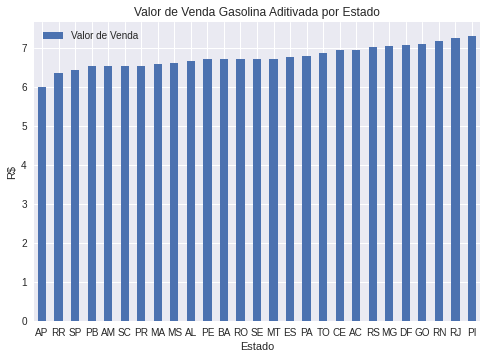

In [198]:
df_gasoa.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values().plot.bar(title="Valor de Venda Gasolina Aditivada por Estado")
plt.xlabel("Estado")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_gasolina_ad_estados.png")

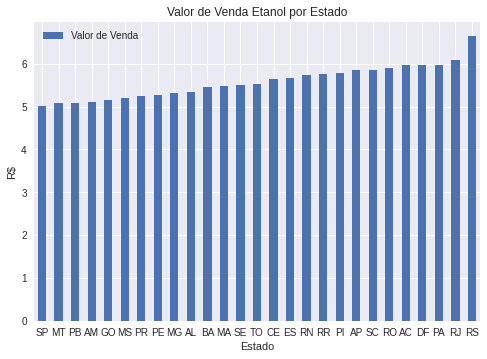

In [199]:
df_eta.groupby("Estado - Sigla")["Valor de Venda"].mean().sort_values().plot.bar(title="Valor de Venda Etanol por Estado")
plt.xlabel("Estado")
plt.ylabel("R$")
plt.xticks(rotation='horizontal')
plt.legend();
plt.savefig("Valor_venda_etanol_estados.png")